## Degree Centrality

Graph loaded: 34 nodes, 78 edges

Top 3 Most Connected Members:
Member	Degree Centrality
33	0.5152
0	0.4848
32	0.3636


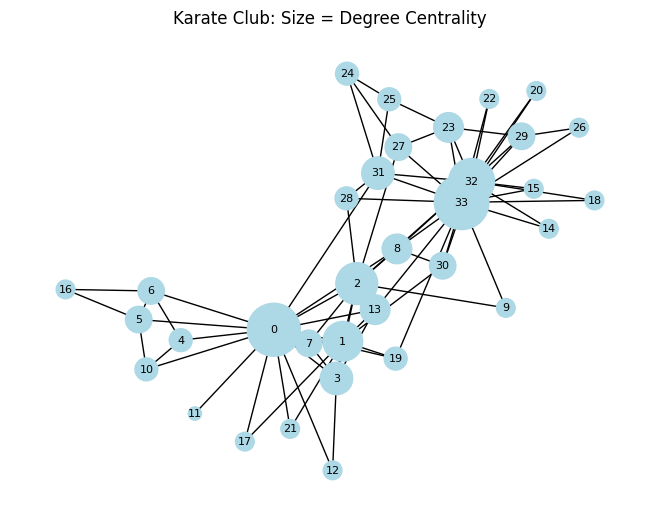

In [ ]:
# ============================================
# DATASET: Karate Club (34 members)
# ============================================
import networkx as nx
import matplotlib.pyplot as plt
# STEP 1: Load the famous Karate Club network
G = nx.karate_club_graph()
print(f"Graph loaded: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
# STEP 2: Calculate & Returns: Dictionary {node: centrality_score}
degree_cent = nx.degree_centrality(G)
# STEP 3: Find top 3 most connected members
sorted_nodes = sorted(degree_cent.items(), key=lambda x: x[1], reverse=True)
print("\nTop 3 Most Connected Members:")
print("Member\tDegree Centrality")
for node, score in sorted_nodes[:3]:
    print(f"{node}\t{score:.4f}")
# STEP 4: Visualize
node_sizes = [v * 3000 for v in degree_cent.values()]
nx.draw(G, node_size=node_sizes, node_color='lightblue',
        with_labels=True, font_size=8)
plt.title("Karate Club: Size = Degree Centrality")
plt.show()

## Betweenness Centrality

Top 3 Bridge Members (Control Information Flow):
Member	Betweenness Centrality
0	0.4376
33	0.3041
32	0.1452

Member0-Degree: 0.4848, Betweenness: 0.4376
Member33-Degree: 0.5152, Betweenness: 0.3041


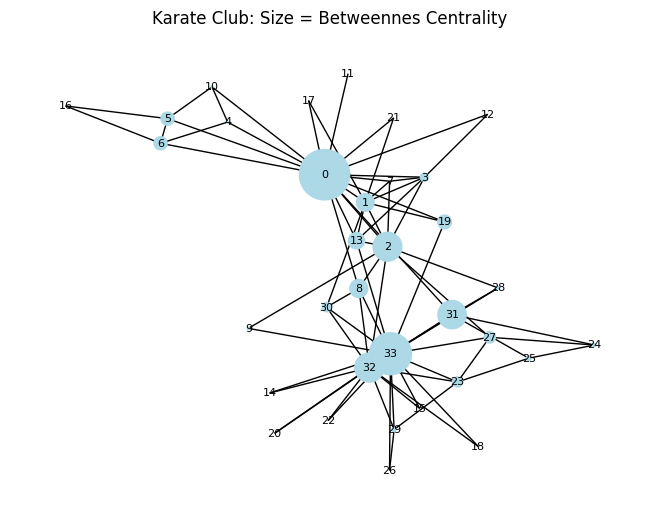

In [ ]:
# ============================================
# ALGORITHM: Betweenness Centrality
# ============================================
import networkx as nx
import matplotlib.pyplot as plt
# STEP 1: Load network
G = nx.karate_club_graph()
# STEP 2: Computes shortest paths between ALL node pairs!
betweenness = nx.betweenness_centrality(G)
# STEP 3: Find top "bridge" members
sorted_nodes = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)
print("Top 3 Bridge Members (Control Information Flow):")
print("Member\tBetweenness Centrality")
for node, score in sorted_nodes[:3]:
    print(f"{node}\t{score:.4f}")
# STEP 4: Compare with degree centrality
degree = nx.degree_centrality(G)
print(f"\nMember0-Degree: {degree[0]:.4f}, Betweenness: {betweenness[0]:.4f}")
print(f"Member33-Degree: {degree[33]:.4f}, Betweenness: {betweenness[33]:.4f}")
# TRY THIS:
# Who has high betweenness but LOW degree? (Hidden influencer!)

node_sizes = [v * 3000 for v in betweenness.values()]
nx.draw(G, node_size=node_sizes, node_color='lightblue',
        with_labels=True, font_size=8)
plt.title("Karate Club: Size = Betweennes Centrality")
plt.show()

## Community Detection

Graph: 34 nodes, 78 edges

Detected 4 communities
Community 0: 5 members - [4, 5, 6, 10, 16]...
Community 1: 11 members - [0, 1, 2, 3, 7]...
Community 2: 12 members - [8, 9, 14, 15, 18]...
Community 3: 6 members - [23, 24, 25, 27, 28]...

Modularity Q = 0.4449


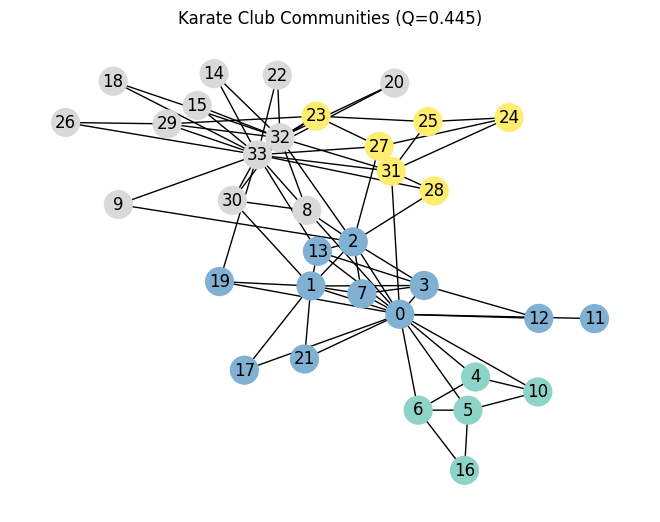

In [1]:
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt

# STEP 1: Load the famous Karate Club network
# This club split into 2 factions - can we predict it?
G = nx.karate_club_graph()
print(f"Graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

# STEP 2: Run Louvain algorithm
# Returns: List of sets, each set is a community
communities = community.louvain_communities(G)

print(f"\nDetected {len(communities)} communities")
for i, comm in enumerate(communities):
    print(f"Community {i}: {len(comm)} members - {sorted(list(comm))[:5]}...")

# STEP 3: Calculate modularity score
modularity = community.modularity(G, communities)
print(f"\nModularity Q = {modularity:.4f}")

# STEP 4: Visualize with colors
node_to_comm = {}
for i, comm in enumerate(communities):
    for node in comm:
        node_to_comm[node] = i

colors = [node_to_comm[node] for node in G.nodes()]
nx.draw(G, node_color=colors, cmap=plt.cm.Set3,
        with_labels=True, node_size=400)
plt.title(f"Karate Club Communities (Q={modularity:.3f})")
plt.show()

Graph: 34 nodes, 78 edges
Louvain              → 4 communities, Q = 0.4402
Label Propagation    → 3 communities, Q = 0.3095
Greedy Modularity    → 3 communities, Q = 0.4110
Girvan-Newman        → 2 communities, Q = 0.3477


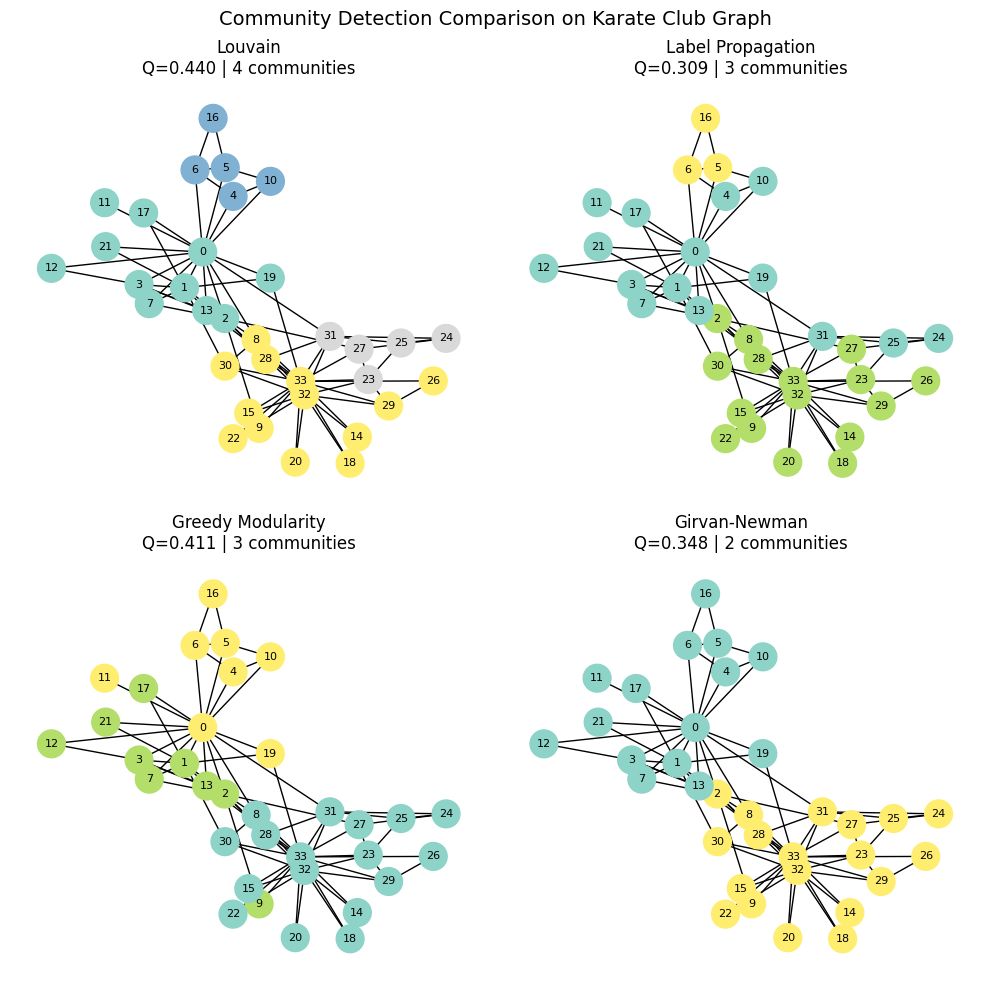

In [2]:
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# STEP 1: Load the Karate Club network
# ------------------------------------------------------------
G = nx.karate_club_graph()
print(f"Graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

# ------------------------------------------------------------
# STEP 2: Define algorithms to compare
# ------------------------------------------------------------
def run_louvain(G):
    comms = community.louvain_communities(G)
    Q = community.modularity(G, comms)
    return comms, Q

def run_label_propagation(G):
    comms = list(community.label_propagation_communities(G))
    Q = community.modularity(G, comms)
    return comms, Q

def run_greedy(G):
    comms = list(community.greedy_modularity_communities(G))
    Q = community.modularity(G, comms)
    return comms, Q

def run_girvan_newman(G, level=2):
    comp = community.girvan_newman(G)
    comms = tuple(sorted(c) for c in next(comp))
    Q = community.modularity(G, comms)
    return comms, Q

algorithms = {
    "Louvain": run_louvain,
    "Label Propagation": run_label_propagation,
    "Greedy Modularity": run_greedy,
    "Girvan-Newman": run_girvan_newman
}

# ------------------------------------------------------------
# STEP 3: Run all and collect results
# ------------------------------------------------------------
results = {}
for name, func in algorithms.items():
    comms, Q = func(G)
    results[name] = (comms, Q)
    print(f"{name:20s} → {len(comms)} communities, Q = {Q:.4f}")

# ------------------------------------------------------------
# STEP 4: Visualize side by side
# ------------------------------------------------------------
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)

for i, (name, (comms, Q)) in enumerate(results.items(), 1):
    plt.subplot(2, 2, i)
    node_to_comm = {}
    for ci, comm in enumerate(comms):
        for node in comm:
            node_to_comm[node] = ci
    colors = [node_to_comm[node] for node in G.nodes()]
    nx.draw(
        G, pos=pos, node_color=colors, cmap=plt.cm.Set3,
        with_labels=True, node_size=400, font_size=8
    )
    plt.title(f"{name}\nQ={Q:.3f} | {len(comms)} communities")

plt.suptitle("Community Detection Comparison on Karate Club Graph", fontsize=14)
plt.tight_layout()
plt.show()
